<a href="https://colab.research.google.com/github/Upasanadhameliya/Python-Machine-Learning-Notebooks/blob/master/Keras_Regression_Code_Along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


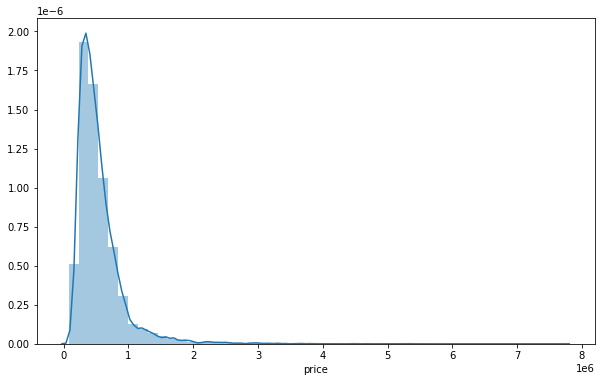

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

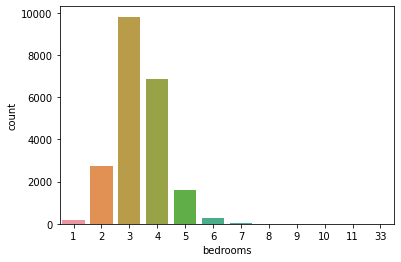

In [ ]:
sns.countplot(df['bedrooms'])

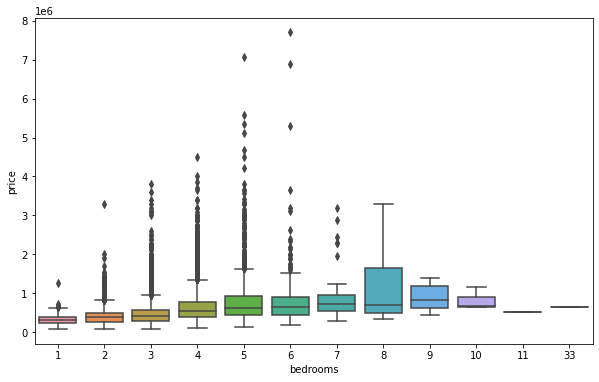

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

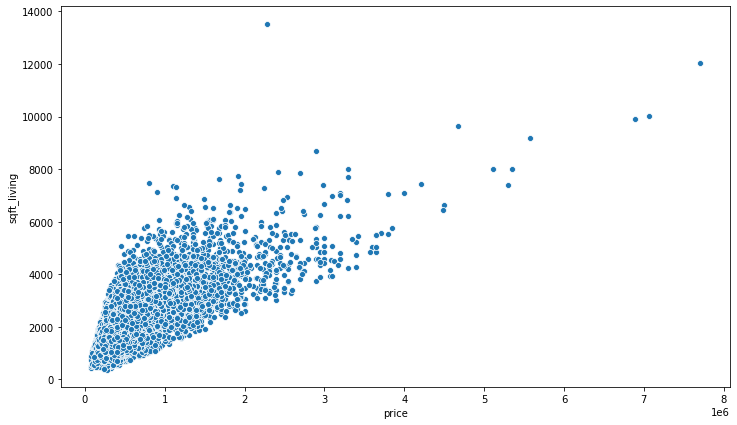

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='price',y='sqft_living',data=df)

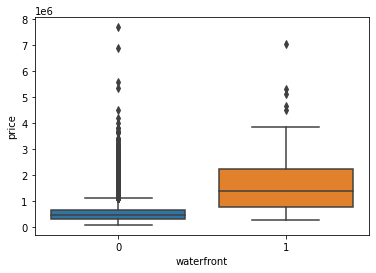

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

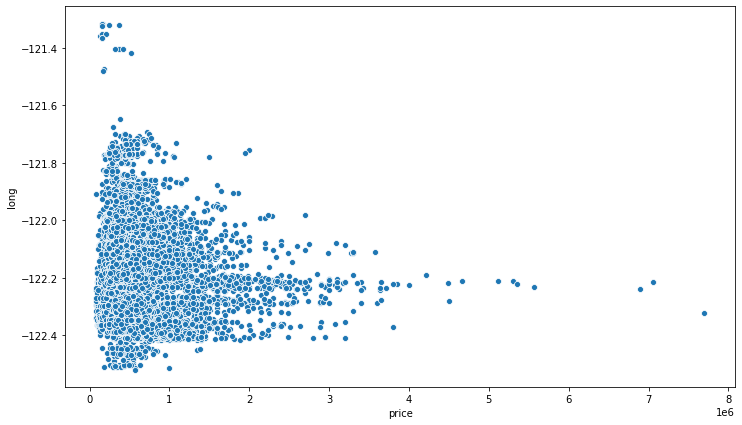

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='price',y='long',data=df)

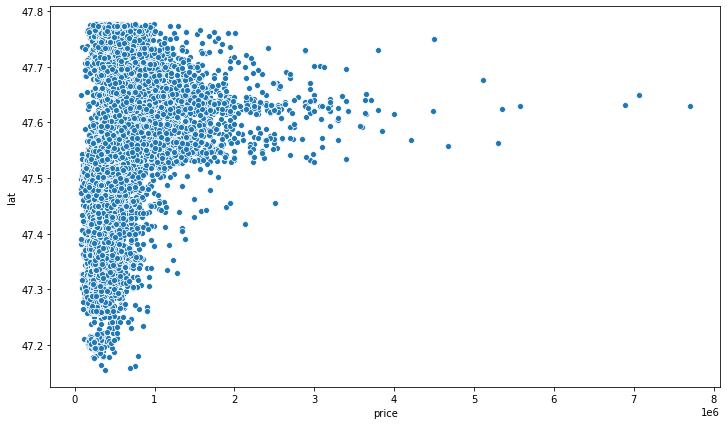

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='price',y='lat',data=df)

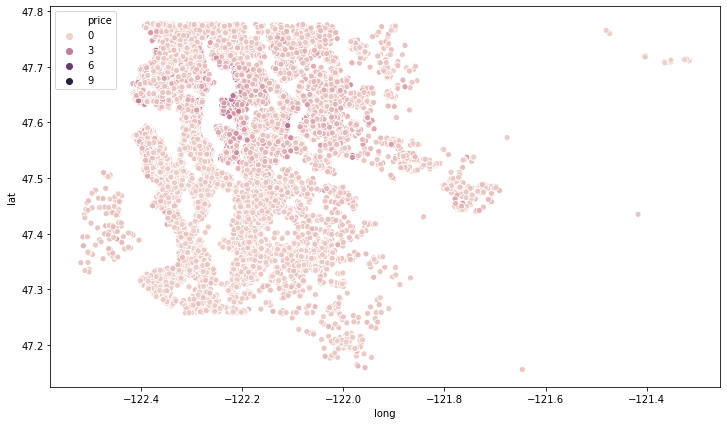

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
len(df['id']) * 0.01

215.97

In [ ]:
not_upper = df.sort_values('price',ascending=False).iloc[216:]

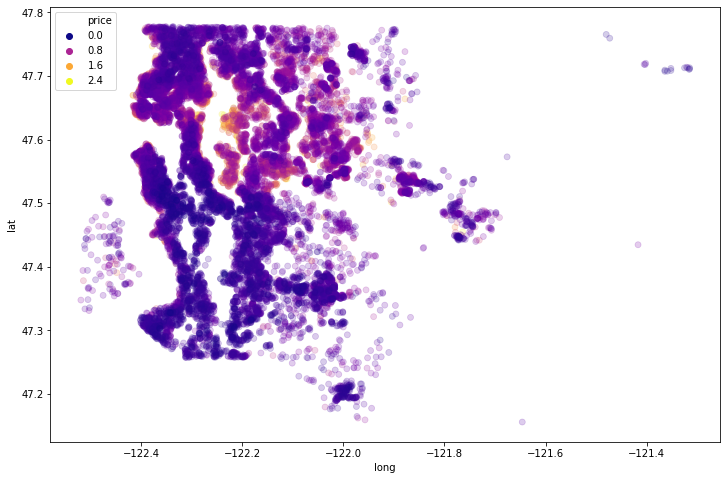

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=not_upper,hue='price',edgecolor=None,palette='plasma',alpha=0.2)

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['year']=df['date'].apply(lambda date:date.year)

In [ ]:
df['month']=df['date'].apply(lambda date:date.month)

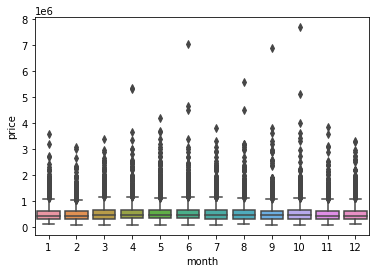

In [ ]:
sns.boxplot(x='month',y='price',data=df)

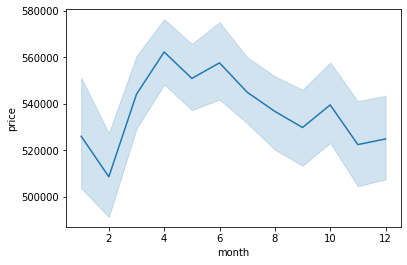

In [ ]:
sns.lineplot(x='month',y='price',data=df)

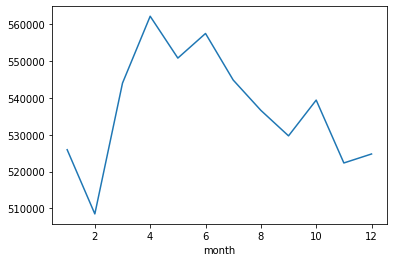

In [ ]:
df.groupby('month').mean()['price'].plot()

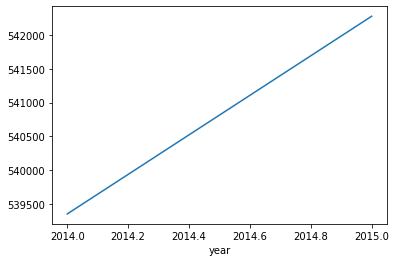

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
X = df.drop('price',axis=1).values

In [ ]:
y = df['price'].values

In [ ]:
scale = MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train = scale.fit_transform(X_train)

In [ ]:
X_test = scale.transform(X_test)

In [ ]:
sq = Sequential()

In [ ]:
sq.add(Dense(19,activation='relu'))
sq.add(Dense(19,activation='relu'))
sq.add(Dense(19,activation='relu'))
sq.add(Dense(19,activation='relu'))

sq.add(Dense(1))

In [ ]:
sq.compile(optimizer='adam',loss='mse')

In [ ]:
sq.fit(x=X_train,y=y_train,batch_size=128,epochs=400,validation_data=(X_test,y_test),verbose=2)

Epoch 1/400
119/119 - 0s - loss: 430236073984.0000 - val_loss: 418889105408.0000
Epoch 2/400
119/119 - 0s - loss: 428813123584.0000 - val_loss: 413878091776.0000
Epoch 3/400
119/119 - 0s - loss: 407997775872.0000 - val_loss: 365418872832.0000
Epoch 4/400
119/119 - 0s - loss: 304752132096.0000 - val_loss: 205566672896.0000
Epoch 5/400
119/119 - 0s - loss: 140734611456.0000 - val_loss: 96764559360.0000
Epoch 6/400
119/119 - 0s - loss: 97733763072.0000 - val_loss: 93216645120.0000
Epoch 7/400
119/119 - 0s - loss: 95424913408.0000 - val_loss: 91451793408.0000
Epoch 8/400
119/119 - 0s - loss: 93476536320.0000 - val_loss: 89592815616.0000
Epoch 9/400
119/119 - 0s - loss: 91477778432.0000 - val_loss: 87583096832.0000
Epoch 10/400
119/119 - 0s - loss: 89412141056.0000 - val_loss: 85683609600.0000
Epoch 11/400
119/119 - 0s - loss: 87271530496.0000 - val_loss: 83443974144.0000
Epoch 12/400
119/119 - 0s - loss: 85006442496.0000 - val_loss: 81241825280.0000
Epoch 13/400
119/119 - 0s - loss: 826649

In [ ]:
lossdf = pd.DataFrame(sq.history.history)

In [ ]:
lossdf.head()

,loss,val_loss
0,4.302361e+11,4.188891e+11
1,4.288131e+11,4.138781e+11
2,4.079978e+11,3.654189e+11
3,3.047521e+11,2.055667e+11
4,1.407346e+11,9.676456e+10


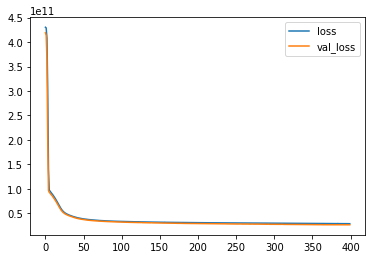

In [ ]:
lossdf.plot()

In [ ]:
pred = sq.predict(X_test)

In [ ]:
print(explained_variance_score(y_test,pred))

0.7998653438076715


In [ ]:
print(mean_absolute_error(y_test,pred))

103171.5624596113


In [ ]:
print(mean_squared_error(y_test,pred))

26735025301.388733


In [ ]:
print(np.sqrt(mean_squared_error(y_test,pred)))

163508.48693994063


In [ ]:
pred = pred.reshape(6480,)

In [ ]:
pred_df = pd.DataFrame([y_test,pred])

In [ ]:
pred_df = pred_df.transpose()

In [ ]:
pred_df.rename({0:'Actual Values',1:'Predicted Values'},axis=1,inplace=True)

In [ ]:
pred_df.head()

,Actual Values,Predicted Values
0,319000.0,398635.3125
1,464625.0,606612.1875
2,489950.0,591167.4375
3,395000.0,401957.1875
4,458000.0,477228.2500


Text(0, 0.5, '')

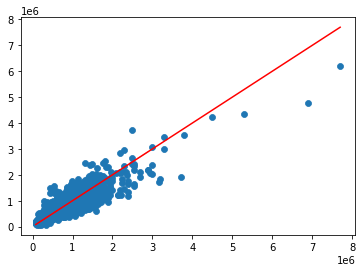

In [ ]:
sns.scatterplot(x='Actual Values',y='Predicted Values',data=pred_df,edgecolor=None)
sns.lineplot(x='Actual Values',y='Actual Values',data=pred_df,color='r')
plt.xlabel(None)
plt.ylabel(None)

In [ ]:
single_house = df.drop('price',axis=1).iloc[0].values

In [ ]:
single_house = scale.transform(single_house.reshape(-1,19))

In [ ]:
pred_price = sq.predict(single_house)

In [ ]:
print(df['price'].iloc[0])

221900.0


In [ ]:
print(pred_price[0,0])

297815.12
